In [89]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [91]:
# looks like there are no null values. Hence, lets check for duplicate values.
df.duplicated().sum()

0

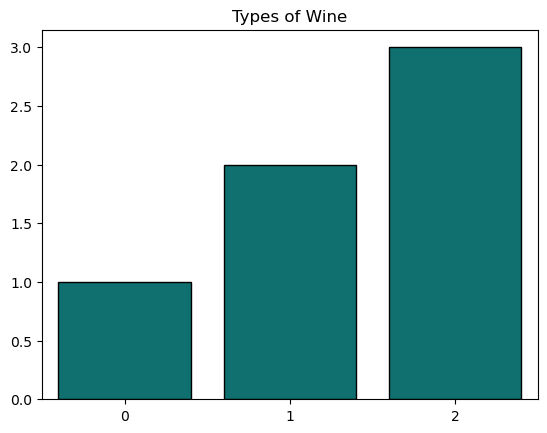

In [92]:
# There are no duplicated values. Nice! Lets Perform EDA.
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Types of Wine')
sns.barplot(df['Type'].unique(),color = 'teal',edgecolor='black')
plt.show()

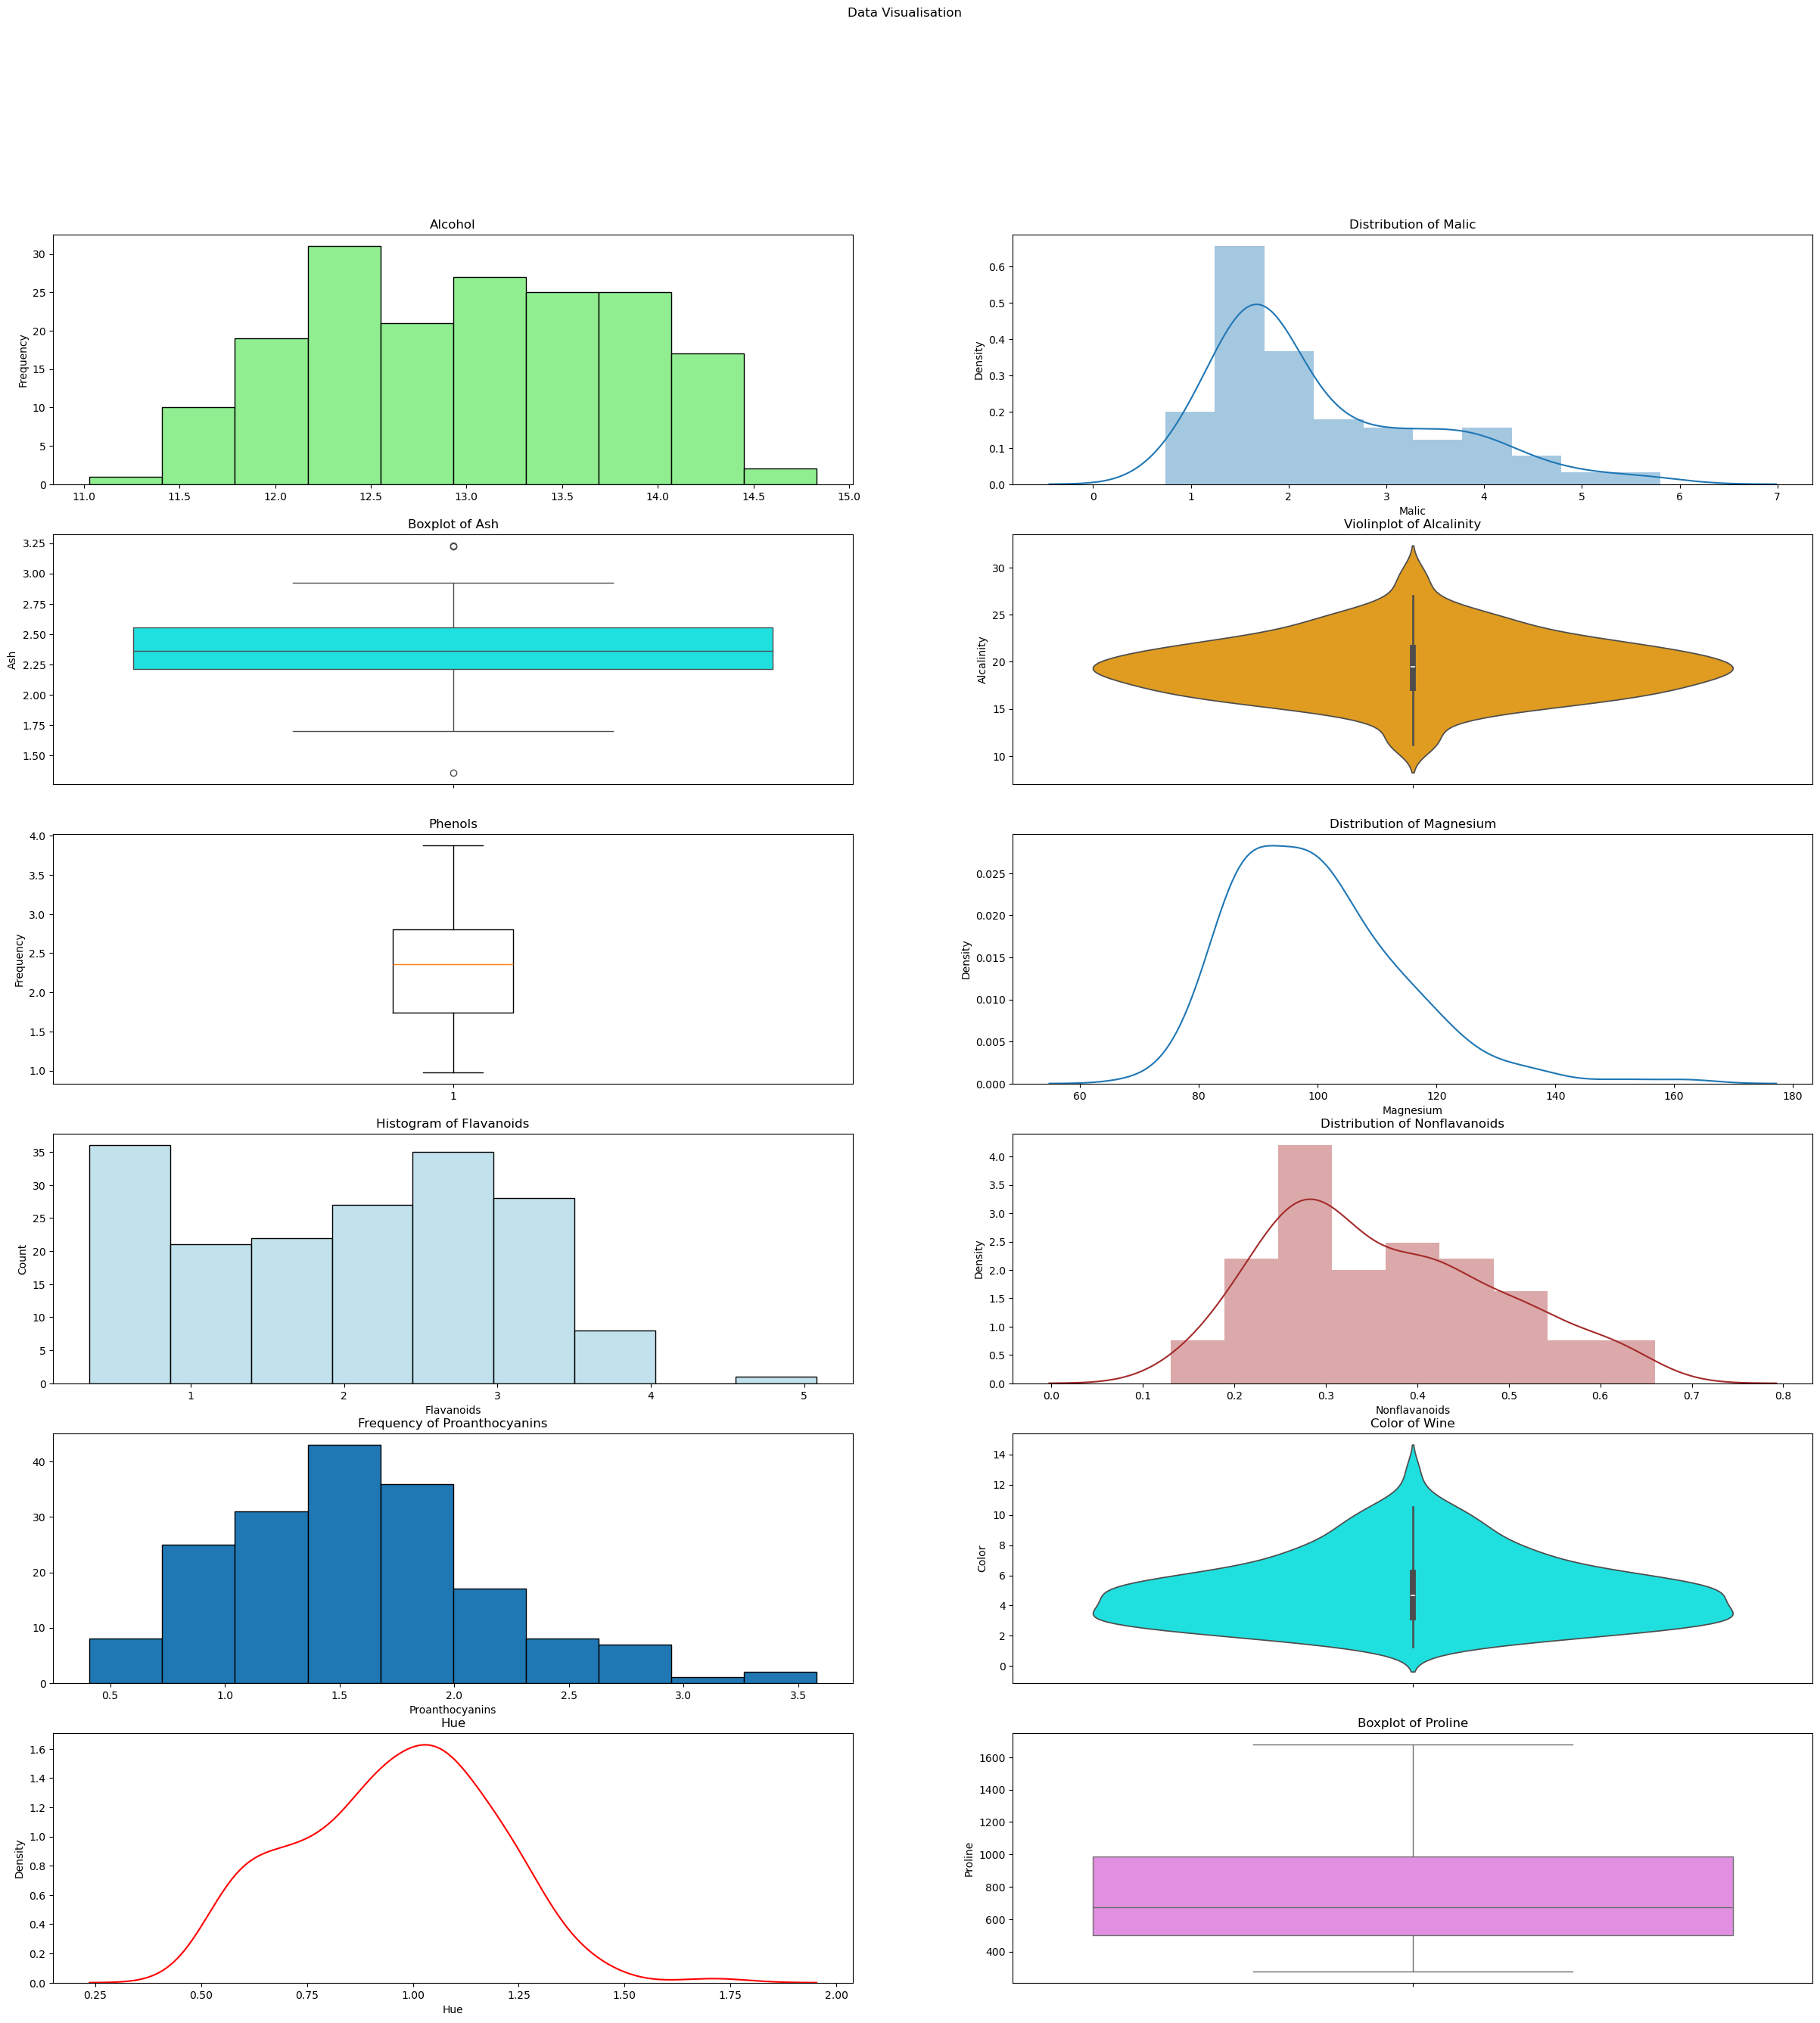

In [93]:
fig , axes = plt.subplots(6,2,figsize = (30,30))
axes[0,0].hist(x = 'Alcohol',data = df,color='lightgreen',edgecolor='black')
axes[0,0].set_title('Alcohol')
axes[0,0].set_ylabel('Frequency')

sns.distplot(df['Malic'], ax=axes[0,1] )
axes[0,1].set_title('Distribution of Malic')

sns.boxplot(df['Ash'],ax = axes[1,0],color='cyan')
axes[1,0].set_title('Boxplot of Ash')

sns.violinplot(df['Alcalinity'],ax=axes[1,1],color='orange')
axes[1,1].set_title('Violinplot of Alcalinity')

axes[2,0].boxplot(x = 'Phenols',data = df)
axes[2,0].set_title('Phenols')
axes[2,0].set_ylabel('Frequency')

sns.kdeplot(df['Magnesium'], ax=axes[2,1] )
axes[2,1].set_title('Distribution of Magnesium')

sns.histplot(df['Flavanoids'],ax = axes[3,0],color='lightblue')
axes[3,0].set_title('Histogram of Flavanoids')

sns.distplot(df['Nonflavanoids'],ax=axes[3,1],color='brown')
axes[3,1].set_title('Distribution of Nonflavanoids')

axes[4,0].hist(df['Proanthocyanins'],edgecolor='black')
axes[4,0].set_xlabel('Proanthocyanins')
axes[4,0].set_title('Frequency of Proanthocyanins')

sns.violinplot(df['Color'],ax = axes[4,1],color='cyan')
axes[4,1].set_title('Color of Wine')

sns.kdeplot(df['Hue'], color='red',ax=axes[5,0])
axes[5,0].set_title('Hue')

sns.boxplot(df['Proline'],color='violet',ax = axes[5,1])
axes[5,1].set_title('Boxplot of Proline')

plt.suptitle('Data Visualisation')
plt.show()

In [94]:
# From the dataset we can understand that "Type" feature is the only categorical data. All the remaining features are continuous. 

In [95]:
# Now Lets find any relations between features.
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<Axes: >

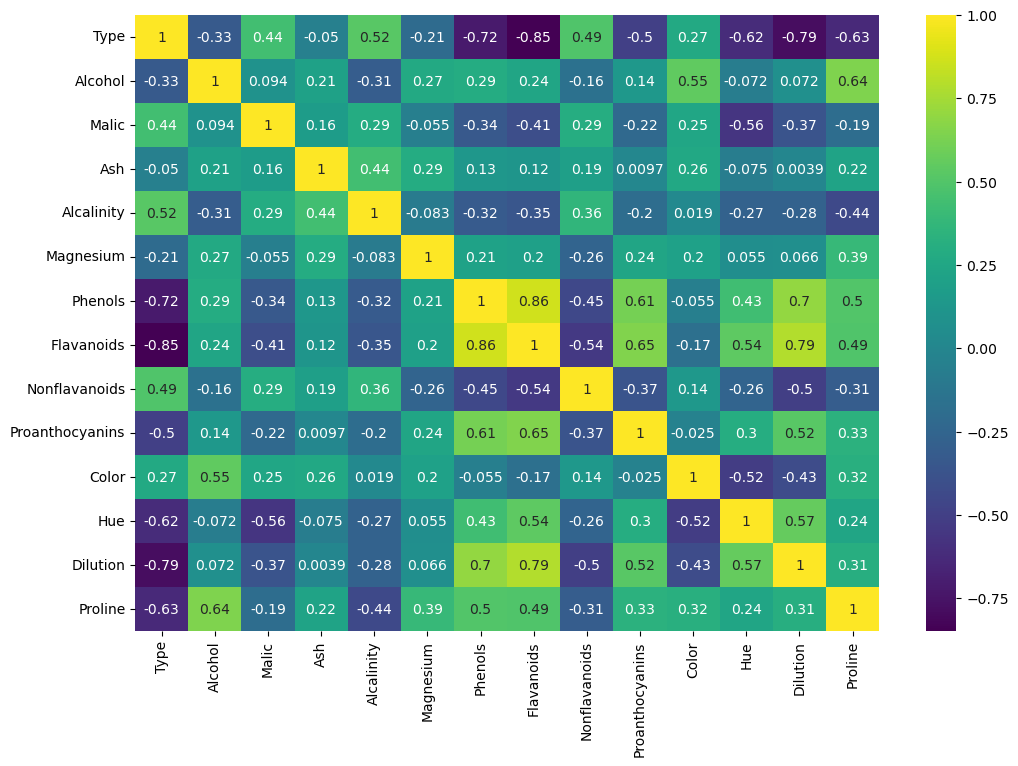

In [96]:
plt.figure(figsize=(12,8))
sns.heatmap(data= df.corr(),annot=True,cmap = 'viridis')

In [97]:
# We can observe that "Type" feature has highly negative relations with some other features such as "Dilution","Flavanoids","Phenols","Hue" and also 
# moderate positive relations with "","Malic","Alcalinity","Alcohol","Nonflavanoids". "Flavanoids" feature also has some positive relations with 
# "Proline","Dilution","Hue","Proanthocyanins","Phenols".

In [98]:
# Lets scale the data to perform PCA.
from sklearn.preprocessing import scale
scaled_values = scale(df)

In [99]:
scaled_values

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
# For PCA we need to convert DataFrame to values to fit and transform to Principle components.

In [101]:
from sklearn.decomposition import PCA
pca = PCA()
pca_values = pca.fit_transform(scaled_values)
pca_values

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [102]:
var = (pca.explained_variance_ratio_)*100
var

array([39.54248599, 17.83625891, 10.32910159,  6.62798449,  6.26787513,
        4.80555958,  3.95570684,  2.50024407,  2.10387101,  1.87361499,
        1.61320301,  1.20569082,  0.92545842,  0.41294515])

In [ ]:
# Variance 

In [103]:
import numpy as np
cummulative_var = np.cumsum(np.round(var,4))

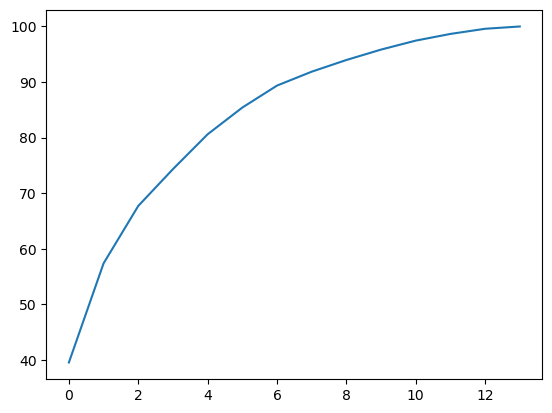

In [104]:
import matplotlib.pyplot as plt
plt.plot(cummulative_var)

In [151]:
Pca_df = pd.DataFrame(pca_values[0:,0:2])
Pca_df.columns = ['pc1','pc2']
Pca_df

,pc1,pc2
0,-3.522934,1.453098
1,-2.528858,-0.330019
2,-2.785029,1.036936
3,-3.922588,2.768210
4,-1.407511,0.867773
...,...,...
173,3.627996,2.206617
174,2.942729,1.752263
175,3.027272,2.756040
176,2.755222,2.293784


In [139]:
# Lets try to perform KMeans algorithm on the original dataset and evaluate using silhouette score.

In [107]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [145]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters = 3).fit(df)
clusters1=model1.predict(df)
clusters1

array([0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1])

In [147]:
from sklearn.metrics import silhouette_score
silhouette_score(df,clusters1)

0.5595717835631026

In [163]:
cluster_df = df.copy()
cluster_df['Clusters'] = clusters1
cluster_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


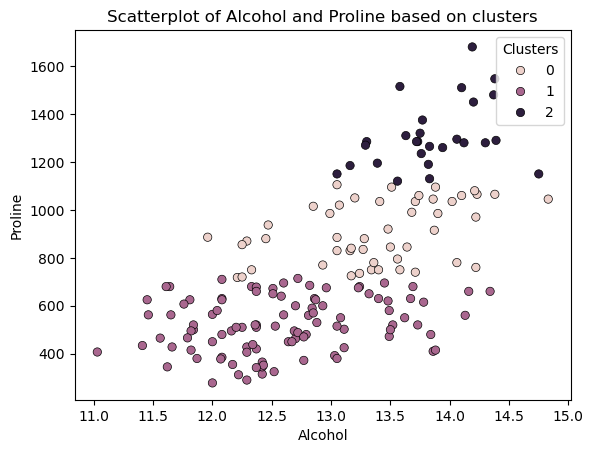

In [183]:
sns.scatterplot(x='Alcohol',y='Proline',hue='Clusters',data=cluster_df,edgecolor='black')
plt.title('Scatterplot of Alcohol and Proline based on clusters')
plt.show()

In [ ]:
# We can see that our model performs well and converts into clusters.

In [159]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = 3).fit(Pca_df)
clusters2 = model2.predict(Pca_df)
clusters2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [161]:
from sklearn.metrics import silhouette_score
silhouette_score(Pca_df,clusters2)

0.6024415520362845

In [112]:
# By constructing pca and performing KMeans algorithm on the data set we are getting a silhouette score of 60%, which is better silhouette score
# of original data.

In [179]:
cluster_df2 = Pca_df.copy()
cluster_df2['Clusters']=clusters2
cluster_df2

,pc1,pc2,Clusters
0,-3.522934,1.453098,1
1,-2.528858,-0.330019,1
2,-2.785029,1.036936,1
3,-3.922588,2.768210,1
4,-1.407511,0.867773,1
...,...,...,...
173,3.627996,2.206617,0
174,2.942729,1.752263,0
175,3.027272,2.756040,0
176,2.755222,2.293784,0


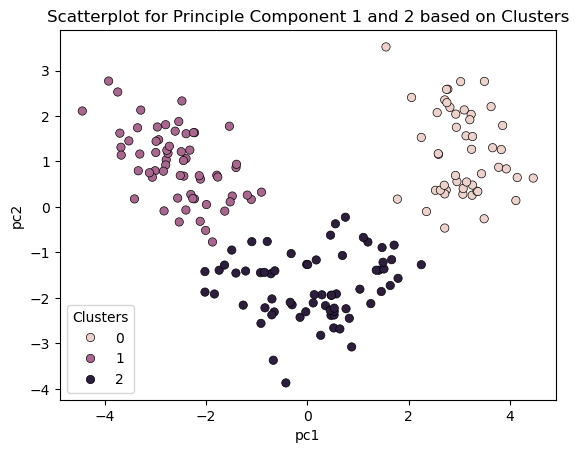

In [185]:
sns.scatterplot(x='pc1',y='pc2',data=cluster_df2,hue='Clusters',edgecolor='black')
plt.title('Scatterplot for Principle Component 1 and 2 based on Clusters')
plt.show()

In [187]:
# Using PCA improved our clusters and also reduced our dimensions greatly.

# Summarize the key findings and insights from the assignment.

# Discuss the practical implications of using PCA and clustering in data analysis

# Provide recommendations for when to use each technique based on the analysis conducted